# Project 3 Part 1 - Uber Fares Dataset
#### By: David Hoffman and Kyle Kolodziej

### 1. Import, Explore, and Clean Data

In [1]:
import pandas as pd
import numpy as np
ubers = pd.read_csv("uber.csv")
ubers.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [2]:
ubers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


It looks like there are 200,000 entries of Ubers in this data set. Also, it appears that dropoff_longitude and dropoff_latitude are the only two factors that have a null entry in one of their rows (they only have 199,999 non-null entries)

In [3]:
# Let's get rid of the 'Unnamed: 0' and 'key' columns and drop the NA values
ubers = ubers.drop(columns=['Unnamed: 0', 'key'])
ubers = ubers.dropna()

In [4]:
max(ubers['pickup_datetime'])

'2015-06-30 23:40:39 UTC'

In [5]:
min(ubers['pickup_datetime'])

'2009-01-01 01:15:22 UTC'

In [6]:
print(min(ubers['fare_amount']), " to ", max(ubers['fare_amount']))

-52.0  to  499.0


The fares range from -52 to 499. A few things seem a little weird with those values. First, a negative fare value. Second, a fare value that high. Will need to look into this more

In [7]:
np.where(ubers['fare_amount'] < 0)

(array([ 63395,  71246,  79903,  89321,  92062,  98874, 104079, 111588,
        139271, 148802, 150300, 151680, 157411, 164055, 179110, 180443,
        190924], dtype=int64),)

In [8]:
ubers.iloc[63395]

fare_amount                             -5.0
pickup_datetime      2015-03-03 23:07:41 UTC
pickup_longitude                  -73.992249
pickup_latitude                    40.748936
dropoff_longitude                 -73.988518
dropoff_latitude                    40.74818
passenger_count                            1
Name: 63395, dtype: object

In [9]:
ubers = ubers[ubers.fare_amount >= 0]

Looking at a few of the negative fare amounts, the data doesn't seem to make much sense as to why it would be negative...let's drop these

In [11]:
np.where(ubers['fare_amount'] == 0)

(array([ 20744,  22182,  87464, 156725, 197154], dtype=int64),)

In [12]:
ubers.iloc[22182]

fare_amount                              0.0
pickup_datetime      2010-03-20 02:59:51 UTC
pickup_longitude                  -73.994366
pickup_latitude                    40.755395
dropoff_longitude                 -73.998718
dropoff_latitude                   40.854853
passenger_count                            2
Name: 22182, dtype: object

In [13]:
ubers = ubers[ubers.fare_amount > 0]

In [14]:
np.where(ubers['fare_amount'] > 200)

(array([  4292,  23680,  29259,  71711, 170062, 185304, 197470],
       dtype=int64),)

In [15]:
ubers.iloc[71715]

fare_amount                              4.5
pickup_datetime      2015-05-28 23:26:17 UTC
pickup_longitude                   -73.97049
pickup_latitude                    40.796719
dropoff_longitude                 -73.975693
dropoff_latitude                   40.795624
passenger_count                            1
Name: 71719, dtype: object

The same goes for when the fare is pricey (just looked at above 200)...let's drop these and then look at trips priced above 100

In [16]:
ubers = ubers[ubers.fare_amount < 200]

In [17]:
np.where(ubers['fare_amount'] > 100)

(array([  2053,   5967,   6612,   9059,  11300,  15361,  15460,  15934,
         16386,  18414,  19508,  22559,  23145,  23229,  28805,  31701,
         33906,  34105,  36328,  39711,  43707,  44368,  45089,  45782,
         51012,  53012,  53991,  58039,  72774,  73583,  79305,  87145,
         90806,  92383,  93030,  95324,  99969, 105791, 110485, 112822,
        114266, 114924, 117349, 120134, 122665, 123980, 127198, 129025,
        131077, 131407, 131856, 134508, 138887, 140405, 141106, 144154,
        145232, 147782, 149003, 150961, 151580, 155042, 158098, 159879,
        163199, 166538, 166862, 173943, 174234, 178426, 183917, 184875,
        188207, 190740, 194426, 196588], dtype=int64),)

In [18]:
ubers.iloc[5967]

fare_amount                            105.0
pickup_datetime      2011-05-06 00:40:00 UTC
pickup_longitude                  -73.752265
pickup_latitude                    40.923303
dropoff_longitude                  -73.75227
dropoff_latitude                   40.923303
passenger_count                            1
Name: 5968, dtype: object

In [19]:
ubers.iloc[9059]

fare_amount                            126.1
pickup_datetime      2011-06-13 15:46:00 UTC
pickup_longitude                  -73.788657
pickup_latitude                    40.640643
dropoff_longitude                  -74.00135
dropoff_latitude                   41.048048
passenger_count                            1
Name: 9060, dtype: object

Some of these are logical, but others aren't. For now going to keep them in, but will return to this later...

In [20]:
timeZones = ubers['pickup_datetime'].str[-3:]
timeZones.unique()

array(['UTC'], dtype=object)

Nice, just working with data in UTC time zone

In [21]:
ubers['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208], dtype=int64)

In [22]:
ubers['passenger_count'].value_counts()

1      138408
2       29423
5       14005
3        8877
4        4276
6        4271
0         708
208         1
Name: passenger_count, dtype: int64

Kinda surprising that there are so many rides of 0 passengers. Does this mean that the ride was cancelled? Might need to investigate this scenario further...

Also, going to drop the one ride of 208 passengers

In [23]:
ubers = ubers[ubers.passenger_count != 208]

Let's take a look at all the numerical features after cleaning it up a little bit

In [24]:
ubers.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199968.000000,199968.000000,199968.000000,199968.000000,199968.000000,199968.000000
mean,11.351885,-72.528891,39.936571,-72.527284,39.924984,1.683469
std,9.733257,11.434090,7.719085,13.112397,6.791829,1.306949
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734797,-73.991407,40.733828,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967157,40.767158,-73.963662,40.768002,2.000000
max,196.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


It also looks like the longitudes and latitudes could have some iffy data (not entirely sure if those values are realistic)

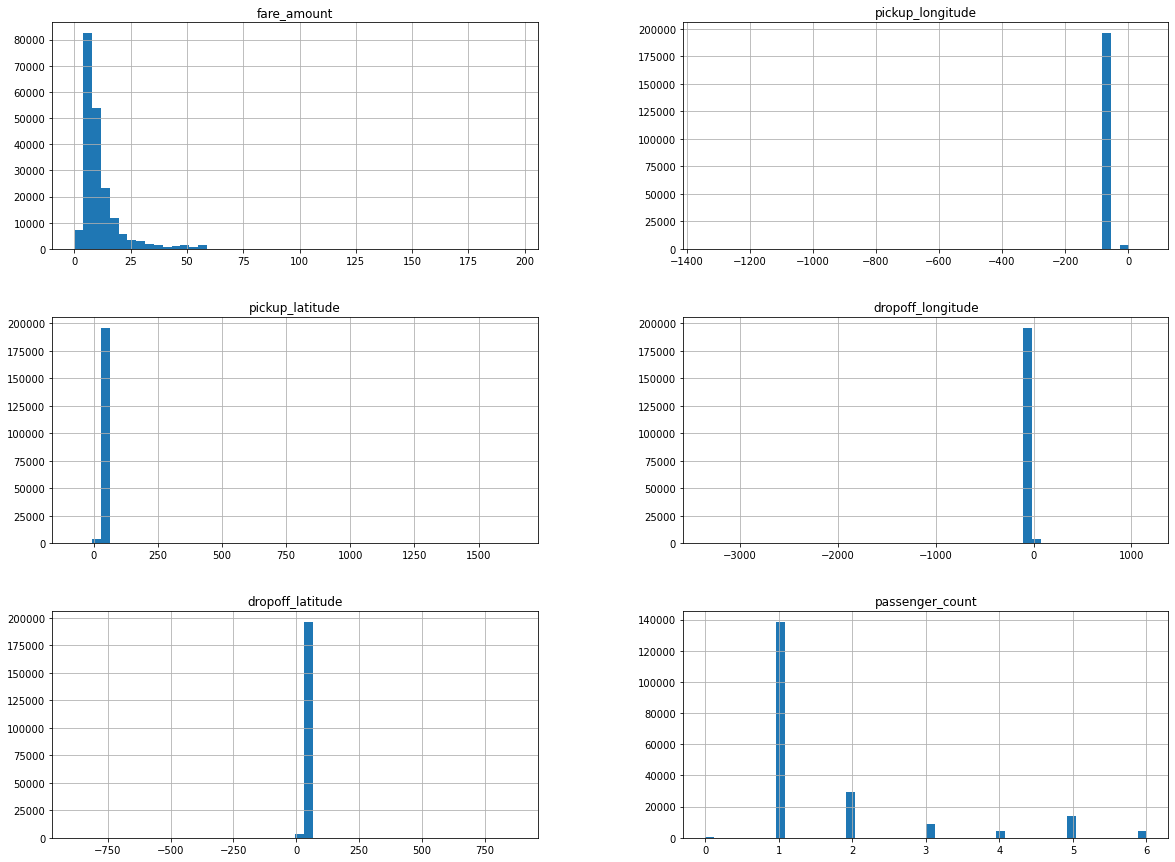

In [25]:
import matplotlib.pyplot as plt
plt = ubers.hist(bins=50, figsize=(20,15))

Besides information listed above, only new takeaways are the amount of fares negative and the grouping of longitude and latitudes so close to each other. Let's take a deeper dive into these longitudes and latitudes...

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

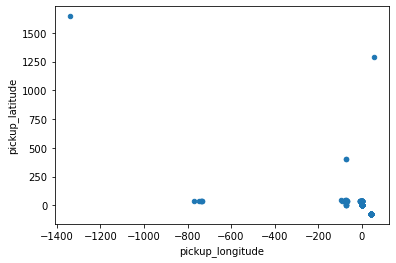

In [26]:
ubers.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude")

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

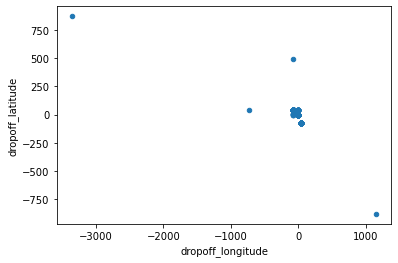

In [27]:
ubers.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude")

As expected, the longitude and latitudes are grouped tightly together (for the most part)

In [28]:
corr_matrix = ubers.corr()

In [29]:
# let's see the correlation to the fare prices
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
passenger_count      0.011434
pickup_longitude     0.007987
dropoff_longitude    0.007055
pickup_latitude     -0.006466
dropoff_latitude    -0.008983
Name: fare_amount, dtype: float64

Doesn't appear to be much correlation at all. Let's add in the difference in latitude and longitude values and see if that shows better correlation with showing the distance between two points

### 2. Custom Transformer

Haversine formula for distance between two points: https://www.geeksforgeeks.org/haversine-formula-to-find-distance-between-two-points-on-a-sphere/

In [30]:
import math
 
# Python 3 program for the
# haversine formula
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

In [31]:
distance = []
for i in range(len(ubers)):
    lat1 = ubers["pickup_latitude"].iloc[i]
    lon1 = ubers["pickup_longitude"].iloc[i]
    lat2 = ubers["dropoff_latitude"].iloc[i]
    lon2 = ubers["dropoff_longitude"].iloc[i]
    d = haversine(lat1, lon1, lat2, lon2)
    distance.append(d)

In [32]:
ubers['distance'] = distance

In [33]:
ubers.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590


In [34]:
corr_matrix2 = ubers.corr()

In [35]:
# let's see the correlation to the fare prices
corr_matrix2["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
distance             0.026068
passenger_count      0.011434
pickup_longitude     0.007987
dropoff_longitude    0.007055
pickup_latitude     -0.006466
dropoff_latitude    -0.008983
Name: fare_amount, dtype: float64

The distance has the highest correlation to the fare amount, but still not a strong correlation

Let's see if we can find something to show a stronger correlation to the fare amount. Let's extract the data in the column "pickup_datetime" and create a column for the year, month, and hour...

In [37]:
# Get the year, month, and hour from the pickup_datetime column
# The hour is calculated by:
# 1) Get the hour
# 2) Add 1 to the hour if the minutes are >= 30
# 3) If adding 1, check to see if the hour is 24, which would mean it needs to be set to 0 
pickup_year = []
pickup_month = []
pickup_hour = []
maxHour = 0

for i in range(len(ubers)):
    temp = ubers["pickup_datetime"].iloc[i]
    vals = temp.split(' ')
    date = vals[0]
    year = int(date[:4])
    month = int(date[5:7])
    time = vals[1]
    hour = int(time[:2])
    minutes = int(time[3:5])
    if hour > maxHour:
        maxHour = hour
    if minutes >= 30:
        hour += 1
        if hour == 24:
            hour = 0
    pickup_year.append(year)
    pickup_month.append(month)
    pickup_hour.append(hour)

ubers['pickup_year'] = pickup_year
ubers['pickup_month'] = pickup_month
ubers['pickup_hour'] = pickup_hour

In [38]:
ubers.head(1)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_year,pickup_month,pickup_hour
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,5,20


In [39]:
corr_matrix3 = ubers.corr()

In [40]:
# let's see the correlation to the fare prices
corr_matrix3["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
pickup_year          0.120005
distance             0.026068
pickup_month         0.023715
passenger_count      0.011434
pickup_longitude     0.007987
dropoff_longitude    0.007055
pickup_latitude     -0.006466
dropoff_latitude    -0.008983
pickup_hour         -0.024147
Name: fare_amount, dtype: float64

The year shows higher correlation, but still not the level of correlation that I was expecting to get

In [41]:
np.where(ubers['distance'] == 0)

(array([     5,      7,     11, ..., 199885, 199900, 199931], dtype=int64),)

Back to the scenario of iffy Uber prices being so high, let's remove unrealistic data/outliers

1) remove the ones that have fares above 25, but a distance of 0

2) remove the ones that have fares above 50, but a distance < 5

3) remove the ones that have fares above 100, but a distance < 10

In [42]:
indexesToDrop = ubers[(ubers.fare_amount >= 25) & (ubers.distance == 0)].index
ubers.drop(indexesToDrop,inplace=True)

indexesToDrop = ubers[(ubers.fare_amount >= 50) & (ubers.distance <= 5)].index
ubers.drop(indexesToDrop,inplace=True)

indexesToDrop = ubers[(ubers.fare_amount >= 100) & (ubers.distance <= 10)].index
ubers.drop(indexesToDrop,inplace=True)

In [43]:
corr_matrix4 = ubers.corr()
# let's see the correlation to the fare prices
corr_matrix4["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
pickup_year          0.122956
distance             0.028033
pickup_month         0.024082
dropoff_latitude     0.016059
pickup_latitude      0.015607
passenger_count      0.014425
dropoff_longitude   -0.016718
pickup_longitude    -0.019414
pickup_hour         -0.022804
Name: fare_amount, dtype: float64

In [44]:
ubers.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_year,pickup_month,pickup_hour
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,5,20
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,7,20


We don't need pickup_datetime anymore, let's drop that

In [45]:
ubers = ubers.drop(columns=['pickup_datetime'])

In [46]:
ubers.head(1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_year,pickup_month,pickup_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,5,20


### 3. StratifiedKFold Cross Validation

In [56]:
from sklearn.model_selection import StratifiedKFold

X = ubers.drop(columns=["fare_amount"])
X = X.values
y = ubers["fare_amount"].values

skf = StratifiedKFold(n_splits=2, random_state=None, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

### 4. Decision Tree Regressor

### 5. OvO Classifier

### 6. Grid Search Hyperparameter Tuning

### 7. Pipeline